<a href="https://colab.research.google.com/github/wantepim84/NetworkX/blob/main/NetworkX_Ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
# Load karate dataset
G_karate = nx.karate_club_graph()
mr_hi = 0
john_a = 33

In [7]:
from pathlib import Path
data_dir = Path('/content/branches.csv')
data_dir2= Path('/content/Geant2012.graphml')

In [8]:
# Load Germany electrical grid
with open(data_dir) as f:
    # Skip header
    next(f)
    # Read edgelist format
    G_electric = nx.read_edgelist(
        f,
        delimiter="\t",
        create_using=nx.Graph,
        data=[('X', float), ('Pmax', float)])

In [9]:
# Load internet point of presence network
G_internet = nx.read_graphml(data_dir2)

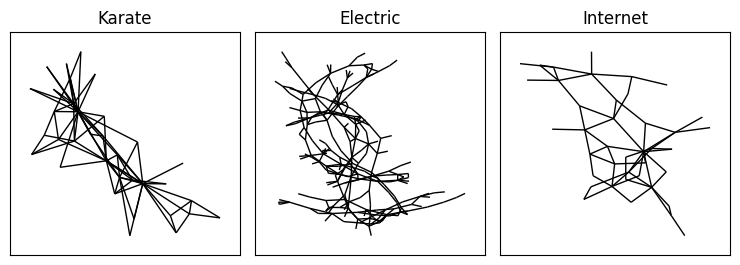

In [10]:
# Create a figure
plt.figure(figsize=(7.5, 2.75))
# Plot networks
plt.subplot(1, 3, 1);
plt.title("Karate")
nx.draw_networkx(G_karate, node_size=0, with_labels=False)
plt.subplot(1, 3, 2)
plt.title("Electric")
nx.draw_networkx(G_electric, node_size=0, with_labels=False)
plt.subplot(1, 3, 3)
plt.title("Internet")
nx.draw_networkx(G_internet, node_size=0, with_labels=False)
# Adjust layout
plt.tight_layout()

In [11]:
# Diameter and mean shortest path
#Findning the shortest path (use' all_shortest path' function)
list(nx.all_shortest_paths(G_karate, mr_hi, john_a))

[[0, 8, 33], [0, 13, 33], [0, 19, 33], [0, 31, 33]]

In [12]:
# use 'shortest_path length@ to find distance of the shortest path
nx.shortest_path_length(G_karate, mr_hi, john_a)

2

In [13]:
# # Calculate dictionary of all shortest paths
length_source_target = dict(nx.shortest_path_length(G_karate))
length_source_target[0][33]

2

In [14]:
# Networks can be characterized according to their distribution of shortest path lengths using this code.
def path_length_histogram(G, title=None):
    # Find path lengths
    length_source_target = dict(nx.shortest_path_length(G))
    # Convert dict of dicts to flat list
    all_shortest = sum(
        [list(length_target.values()) for length_target in length_source_target.values()],
        [])
    # Calculate integer bins
    high = max(all_shortest)
    bins = [-0.5 + i for i in range(high + 2)]
    # Plot histogram
    plt.hist(all_shortest, bins=bins, rwidth=0.8)
    plt.title(title)
    plt.xlabel("Distance")
    plt.ylabel("Count")

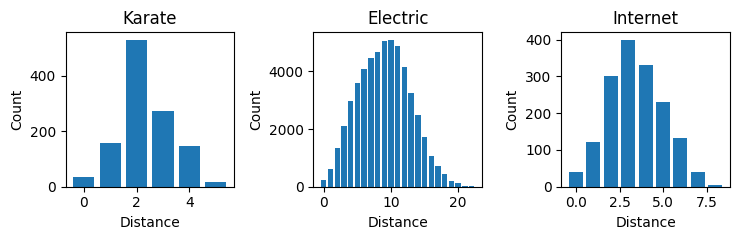

In [15]:
# Comparing path length distribution of the three examples
plt.figure(figsize=(7.5, 2.5))
plt.subplot(1, 3, 1)
path_length_histogram(G_karate, title="Karate")
plt.subplot(1, 3, 2)
path_length_histogram(G_electric, title="Electric")
plt.subplot(1, 3, 3)
path_length_histogram(G_internet, title="Internet")
plt.tight_layout()

In [16]:
# use 'mean shortest path length' function as a summary measure
nx.average_shortest_path_length(G_karate)

2.408199643493761

In [17]:
nx.average_shortest_path_length(G_electric)

9.044193487671748

In [18]:
nx.average_shortest_path_length(G_internet)

3.528205128205128

In [19]:
# 'Diameter()' function to find the larget path
nx.diameter(G_karate)

5

In [20]:
nx.diameter(G_electric)

22

In [21]:
nx.diameter(G_internet)

8

In [22]:
# CLustering (use either 'transivity' or 'average_clustering' functions)
nx.transitivity(G_karate)

0.2556818181818182

In [23]:
nx.transitivity(G_electric)

0.07190412782956059

In [24]:
nx.transitivity(G_electric)

0.07190412782956059

In [25]:
nx.average_clustering(G_karate)

0.5706384782076823

In [26]:
nx.average_clustering(G_electric)

0.06963512677798392

In [27]:
nx.average_clustering(G_internet)

0.1544047619047619

In [28]:
# Resilience
# To measure the resilience, use the 'density' function
nx.density(G_karate)

0.13903743315508021

In [29]:
nx.density(G_electric)

0.011368341803124411

In [30]:
nx.density(G_internet)

0.0782051282051282

In [31]:
# Minimum cuts
# Identify minimum cut nodes
import networkx.algorithms.connectivity as nxcon
nxcon.minimum_st_node_cut(G_karate, mr_hi, john_a)

{2, 8, 13, 19, 30, 31}

In [32]:
#  Identify minimum cut edges
nxcon.minimum_st_edge_cut(G_karate, mr_hi, john_a)

{(0, 8),
 (0, 31),
 (1, 30),
 (2, 8),
 (2, 27),
 (2, 28),
 (2, 32),
 (9, 33),
 (13, 33),
 (19, 33)}

In [33]:
# To find the size of the minimum cut (use 'node_connectivty' or 'edge connectivity' functions)
nx.node_connectivity(G_karate, mr_hi, john_a)

6

In [34]:
nx.edge_connectivity(G_karate, mr_hi, john_a)

10

In [35]:
#Connectivty- to find the actual node/edge cut (use 'connecton' function)
nxcon.minimum_node_cut(G_karate)

{0}

In [36]:
nxcon.minimum_edge_cut(G_karate)

{(11, 0)}

In [37]:
nx.node_connectivity(G_karate)

1

In [38]:
nx.node_connectivity(G_electric)

1

In [39]:
nx.node_connectivity(G_internet)

1

In [40]:
# Reliabilty can be found using 'average' functions
nx.average_node_connectivity(G_karate)

2.2174688057040997

In [41]:
nx.average_node_connectivity(G_electric)

1.5188029361942406

In [42]:
nx.average_node_connectivity(G_internet)

1.7346153846153847

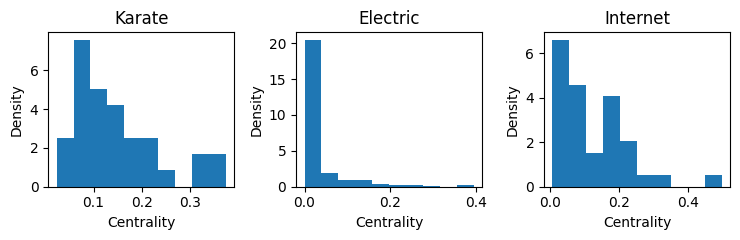

In [43]:
# Centralisation and Inequality
# plots histograms of the eigenvector centralities for each of the example networks
# Function to plot a single histogram
def centrality_histogram(x, title=None):
    plt.hist(x, density=True)
    plt.title(title)
    plt.xlabel("Centrality")
    plt.ylabel("Density")

# Create a figure
plt.figure(figsize=(7.5, 2.5))
# Calculate centralities for each example and plot
plt.subplot(1, 3, 1)
centrality_histogram(
    nx.eigenvector_centrality(G_karate).values(), title="Karate")
plt.subplot(1, 3, 2)
centrality_histogram(
    nx.eigenvector_centrality(G_electric, max_iter=1000).values(), title="Electric")
plt.subplot(1, 3, 3)
centrality_histogram(
    nx.eigenvector_centrality(G_internet).values(), title="Internet")

# Adjust the layout
plt.tight_layout()

In [44]:
# Entropy in netwrok sciecne can be used to measure inequality
import math
def entropy(x):
    # Normalize
    total = sum(x)
    x = [xi / total for xi in x]
    H = sum([-xi * math.log2(xi) for xi in x])
    return H

In [45]:
entropy(nx.eigenvector_centrality(G_karate).values())

4.842401948329853

In [46]:
entropy(nx.eigenvector_centrality(G_electric, max_iter=1000).values())

6.030447144924192

In [47]:
entropy(nx.eigenvector_centrality(G_internet).values())

4.86203726163741

In [48]:
#Gini index- used to measure inequality
def gini(x):
    x = [xi for xi in x]
    n = len(x)
    gini_num = sum([sum([abs(x_i - x_j) for x_j in x]) for x_i in x])
    gini_den = 2.0 * n * sum(x)
    return gini_num / gini_den

In [49]:
gini(nx.eigenvector_centrality(G_karate).values())

0.3244949051532847

In [51]:
gini(nx.eigenvector_centrality(G_electric, max_iter=1000).values())

0.787950636595495

In [52]:
gini(nx.eigenvector_centrality(G_internet).values())

0.4343286009726223